In [2]:
import pandas as pd
import numpy as np
import re
# Set display options to show full content in columns
pd.set_option('display.max_colwidth', None)
import sys
from pathlib import Path

# Get the path to the current script
current_dir = Path.cwd()

# Go one level up
current_dir = current_dir.parent

# Add the 'scripts' directory to sys.path to be able to import data_utils.py
sys.path.append(str(current_dir))

from scripts.data_utils import split_summary_methods
import ast  
import matplotlib.pyplot as plt
import seaborn as sns
from autorank import autorank, plot_stats, create_report

In [3]:
DEFAULT_PARAMS_ALL = pd.array([
        "OnlineBootKNN_60_{'algorithm': 'brute', 'alpha': 0.05, 'chunk_size': 240, 'dmetric': 'cityblock', 'ensemble_size': 240, 'n_jobs': -1, 'transf': 'ZNORM'}", 
        "OnlineBootKNN_120_{'algorithm': 'brute', 'alpha': 0.05, 'chunk_size': 240, 'dmetric': 'cityblock', 'ensemble_size': 240, 'n_jobs': -1, 'transf': 'ZNORM'}", 
        "OnlineBootKNN_240_{'algorithm': 'brute', 'alpha': 0.05, 'chunk_size': 240, 'dmetric': 'cityblock', 'ensemble_size': 240, 'n_jobs': -1, 'transf': 'ZNORM'}", 
       "ExactStorm_60_{'max_radius': 0.1}", 
       "ExactStorm_120_{'max_radius': 0.1}", 
       "ExactStorm_240_{'max_radius': 0.1}", 
       "RSHash_60_{'decay': 0.015, 'feature_maxes': [10000], 'feature_mins': [0], 'num_components': 100, 'num_hash_fns': 1}",
       "RSHash_120_{'decay': 0.015, 'feature_maxes': [10000], 'feature_mins': [0], 'num_components': 100, 'num_hash_fns': 1}",
       "RSHash_240_{'decay': 0.015, 'feature_maxes': [10000], 'feature_mins': [0], 'num_components': 100, 'num_hash_fns': 1}",
       "HStree_60_{'anomaly_threshold': 0.5, 'max_depth': 15, 'number_of_trees': 25, 'size_limit': 0.1}", 
       "HStree_120_{'anomaly_threshold': 0.5, 'max_depth': 15, 'number_of_trees': 25, 'size_limit': 0.1}", 
       "HStree_240_{'anomaly_threshold': 0.5, 'max_depth': 15, 'number_of_trees': 25, 'size_limit': 0.1}", 
       "xStream_60_{'depth': 25, 'n_chains': 100, 'num_components': 100}", 
       "xStream_120_{'depth': 25, 'n_chains': 100, 'num_components': 100}", 
       "xStream_240_{'depth': 25, 'n_chains': 100, 'num_components': 100}", 
       "KitNet_60_{'hidden_ratio': 0.75, 'learning_rate': 0.1, 'max_size_ae': 10}",
       "KitNet_120_{'hidden_ratio': 0.75, 'learning_rate': 0.1, 'max_size_ae': 10}",
       "KitNet_240_{'hidden_ratio': 0.75, 'learning_rate': 0.1, 'max_size_ae': 10}",
       "IForestASD_60_{'initial_window_X': None}",
       "IForestASD_120_{'initial_window_X': None}",
       "IForestASD_240_{'initial_window_X': None}",
       "oIF_60_{'growth_criterion': 'adaptive', 'max_leaf_samples': 32, 'n_jobs': -1, 'num_trees': 32}",
       "oIF_120_{'growth_criterion': 'adaptive', 'max_leaf_samples': 32, 'n_jobs': -1, 'num_trees': 32}",
       "oIF_240_{'growth_criterion': 'adaptive', 'max_leaf_samples': 32, 'n_jobs': -1, 'num_trees': 32}",
       "RobustRandomCutForest_60_{'num_trees': 4, 'tree_size': 256}",
       "RobustRandomCutForest_120_{'num_trees': 4, 'tree_size': 256}",
       "RobustRandomCutForest_240_{'num_trees': 4, 'tree_size': 256}"
       ], 
      dtype=object)




In [4]:
DEFAULT_PARAMS_FIXED_WINDOW = pd.array(["HStree_120_{'anomaly_threshold': 0.5, 'max_depth': 15, 'number_of_trees': 25, 'size_limit': 0.1}",
       "xStream_120_{'depth': 25, 'n_chains': 100, 'num_components': 100}",
       "RSHash_120_{'decay': 0.015, 'feature_maxes': [10000], 'feature_mins': [0], 'num_components': 100, 'num_hash_fns': 1}",
       "ExactStorm_120_{'max_radius': 0.1}",
       "RobustRandomCutForest_120_{'num_trees': 4, 'tree_size': 256}",
       "SWKNN_120_{'k': 1, 'k_is_max': False, 'max_node_size': 20, 'metric': 'cityblock', 'min_node_size': 5, 'split_sampling': 5}",
       "OnlineBootKNN_120_{'algorithm': 'brute', 'alpha': 0.05, 'chunk_size': 240, 'dmetric': 'cityblock', 'ensemble_size': 240, 'n_jobs': -1, 'transf': 'ZNORM'}",
       "oIF_120_{'growth_criterion': 'adaptive', 'max_leaf_samples': 32, 'n_jobs': -1, 'num_trees': 32}",
       "IForestASD_120_{'initial_window_X': None}",
       "KitNet_120_{'hidden_ratio': 0.75, 'learning_rate': 0.1, 'max_size_ae': 10}"],
      dtype=object)


In [5]:
PARAMS=DEFAULT_PARAMS_ALL

In [6]:
summary_results = pd.read_excel(current_dir / "datasets" / "summaries" / "summary_results_online_detectors_pv_ds.xlsx")
summary_results.method_window_and_param.unique()

array(["SWKNN_60_{'k': 10, 'k_is_max': False, 'max_node_size': 20, 'metric': 'cityblock', 'min_node_size': 5, 'split_sampling': 5}",
       "SWKNN_60_{'k': 1, 'k_is_max': False, 'max_node_size': 20, 'metric': 'cityblock', 'min_node_size': 5, 'split_sampling': 5}",
       "SWKNN_60_{'k': 50, 'k_is_max': False, 'max_node_size': 20, 'metric': 'cityblock', 'min_node_size': 5, 'split_sampling': 5}",
       "SWKNN_120_{'k': 50, 'k_is_max': False, 'max_node_size': 20, 'metric': 'cityblock', 'min_node_size': 5, 'split_sampling': 5}",
       "SWKNN_120_{'k': 1, 'k_is_max': False, 'max_node_size': 20, 'metric': 'cityblock', 'min_node_size': 5, 'split_sampling': 5}",
       "SWKNN_120_{'k': 10, 'k_is_max': False, 'max_node_size': 20, 'metric': 'cityblock', 'min_node_size': 5, 'split_sampling': 5}",
       "SWKNN_240_{'k': 50, 'k_is_max': False, 'max_node_size': 20, 'metric': 'cityblock', 'min_node_size': 5, 'split_sampling': 5}",
       "SWKNN_240_{'k': 1, 'k_is_max': False, 'max_node_size': 20, 

In [7]:
# Sample pivot table (replace this with your pivot table)
duplicates = summary_results[["iteration", "scenario", "method_window_and_param", "count_cleaned_score"]].duplicated(keep=False)
summary_results[duplicates][["iteration", "scenario", "method_window_and_param", "count_cleaned_score"]].sort_values(by=["method_window_and_param"])

,iteration,scenario,method_window_and_param,count_cleaned_score


In [8]:
pivot = summary_results.pivot_table(values=["count_cleaned_score", "count_anomalies"], 
                                  index=["scenario"], aggfunc='mean')

# Calculate the percentage of anomalies
pivot['percentage_anomalies'] = (pivot['count_anomalies'] / pivot['count_cleaned_score']) * 100

# Display the sorted pivot table
pivot


,count_anomalies,count_cleaned_score,percentage_anomalies
scenario,,,
A1,60.0,4200.0,1.428571
A2,300.0,4200.0,7.142857
A3,600.0,4200.0,14.285714
A4,60.0,4200.0,1.428571
A5,300.0,4200.0,7.142857
A6,600.0,4200.0,14.285714
A7,60.0,4200.0,1.428571
A8,300.0,4200.0,7.142857
A9,600.0,4200.0,14.285714


In [9]:
summary_results[['method',"window_size", 'parameters']] = summary_results['method_window_and_param'].apply(
    lambda x: pd.Series(split_summary_methods(x))
)
# Sample pivot table (replace this with your pivot table)
pivot = summary_results.pivot_table(values=["count_cleaned_score"], 
                                  index=['method',"window_size", 'parameters', "iteration", "scenario"], aggfunc='sum').reset_index()

pivot = pivot[pivot.count_cleaned_score != 4200]
pivot["window_and_iter_scenario"] = "Window: "+pivot["window_size"].astype(str) + " - Iteration: " + pivot["iteration"].astype(str) + " - Scenario: " + pivot["scenario"].astype(str) +" - Total: " + pivot["count_cleaned_score"].astype(str)
# Display the sorted pivot table


In [10]:
# Apply function to create new columns
summary_results[['method',"window_size", 'parameters']] = summary_results['method_window_and_param'].apply(
    lambda x: pd.Series(split_summary_methods(x))
)
summary_results["params_with_window"] = summary_results["parameters"]+ "_{'window_size':" + summary_results['window_size']+"}"
summary_results["params_with_window"] = summary_results["params_with_window"].str.replace("}_{", ",", regex=False)

# Define the order you want for the 'scenario' column
order = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9']

# Convert the 'scenario' column to a categorical type with the specified order
summary_results['scenario'] = pd.Categorical(summary_results['scenario'], categories=order, ordered=True)


In [11]:
regex_filter = "|".join(["'transf': 'None'", "shingle_size",'SWKNN'])
regex_ablation = "|".join(["KNN"])
filtered_data = summary_results[~summary_results['method_window_and_param'].str.contains(regex_filter, regex=True)]
df_ablation = summary_results[summary_results['method_window_and_param'].str.contains(regex_ablation, regex=True)]

#filtered_data = filtered_data[filtered_data['method'].str.contains("std_p")]
#filtered_data = filtered_data[filtered_data['method'].str.contains("None|FOD|SOD|DIL|QUANT")]
#filtered_data = filtered_data[filtered_data['method'].str.contains("QUANT")]
#filtered_data = filtered_data[filtered_data.method.str.contains("OnlineBootGP|OnlineBootKNN")]

# Now, sort the data based on the 'scenario' column
filtered_data = filtered_data.sort_values(by='scenario')

#filtered_data = filtered_data[~filtered_data.window_size.isin(["60"])]

#filtered_data = filtered_data[filtered_data.method.isin(["ExactStorm", "OnlineBootKNN"])]
#filtered_data = filtered_data[filtered_data.scenario.isin(["A1", "A4","A7"])]


filtered_data = filtered_data[filtered_data['method_window_and_param'].isin(PARAMS)]


# average results over all iterations and all scenarios
averaged_results = filtered_data.groupby(['method', 'scenario', 'params_with_window'])['AUC_PR'].agg(
    mean_auc_pr='mean',
    std_auc_pr='std',
    n_runs='count'
).reset_index()

summary = averaged_results.groupby(['method', 'params_with_window']).agg(
    mean_auc_pr=('mean_auc_pr', 'mean'),
    std_auc_pr=('std_auc_pr', 'mean'),
    n_scenarios=('mean_auc_pr', 'count')
).reset_index()

total_scenarios = len(filtered_data.scenario.unique())
# Compute overall mean, std, and count across all datasets
# Exclude the rows where the number of scenarios is not equal to total_scenarios
summary = summary[summary.n_scenarios==total_scenarios]

# Select the highest AUC_PR per method (after averaging across iterations)
best_results = (
    summary
    .sort_values(['mean_auc_pr','std_auc_pr'], ascending=[False, True])
    .groupby('method')
    .head(1)
)
best_params = best_results['params_with_window'].unique().tolist()

# Ensure parameters are strings for consistent matching

# Filter rows where 'parameters' column contains any of the best_params
filtered_data = filtered_data[filtered_data['params_with_window'].isin(best_params)]

best_params

/tmp/ipykernel_1937330/3015929330.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  averaged_results = filtered_data.groupby(['method', 'scenario', 'params_with_window'])['AUC_PR'].agg(


["{'algorithm': 'brute', 'alpha': 0.05, 'chunk_size': 240, 'dmetric': 'cityblock', 'ensemble_size': 240, 'n_jobs': -1, 'transf': 'ZNORM','window_size':120}",
 "{'hidden_ratio': 0.75, 'learning_rate': 0.1, 'max_size_ae': 10,'window_size':240}",
 "{'initial_window_X': None,'window_size':240}",
 "{'max_radius': 0.1,'window_size':120}",
 "{'depth': 25, 'n_chains': 100, 'num_components': 100,'window_size':60}",
 "{'anomaly_threshold': 0.5, 'max_depth': 15, 'number_of_trees': 25, 'size_limit': 0.1,'window_size':60}",
 "{'num_trees': 4, 'tree_size': 256,'window_size':240}",
 "{'decay': 0.015, 'feature_maxes': [10000], 'feature_mins': [0], 'num_components': 100, 'num_hash_fns': 1,'window_size':120}",
 "{'growth_criterion': 'adaptive', 'max_leaf_samples': 32, 'n_jobs': -1, 'num_trees': 32,'window_size':240}"]

In [12]:
new_method_name = {"xStream":"XStream", "RSHash":"RSHash", "IForestASD":"IFASD", "RobustRandomCutForest":"RRCF", "KitNet":"KitNet", "ExactStorm":"EStorm","oIF":"OIF", "HStree":"HStree", "OnlineBootKNN":"OBKNN"} 

filtered_data["method"] = filtered_data['method'].replace(new_method_name)

method_and_year = {"XStream":"2018", "RSHash":"2011", "IFASD":"2013", "RRCF":"2016", "KitNet":"2018", "EStorm":"2007","OIF":"2024", "HStree":"2011", "OBKNN":"2025"} 
# Create new column combining method and year

filtered_data["method_and_year"] = filtered_data['method'].map(lambda x: f"{x} ({method_and_year.get(x, 'Unknown')})")


In [13]:
filtered_data.method_and_year.unique()

array(['OBKNN (2025)', 'RRCF (2016)', 'XStream (2018)', 'HStree (2011)',
       'RSHash (2011)', 'EStorm (2007)', 'OIF (2024)', 'KitNet (2018)',
       'IFASD (2013)'], dtype=object)

In [14]:
# Sample pivot table (replace this with your pivot table)
pivot = filtered_data.pivot_table(values=["count_cleaned_score", "count_anomalies"], 
                                  index=["scenario"], aggfunc='mean')

# Calculate the percentage of anomalies
pivot['percentage_anomalies'] = (pivot['count_anomalies'] / pivot['count_cleaned_score']) * 100



/tmp/ipykernel_1937330/48154947.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = filtered_data.pivot_table(values=["count_cleaned_score", "count_anomalies"],


## Summary Score of Online Anomaly Detectors with PV Datasets 

In [15]:
# Pivot for mean
mean_pivot = filtered_data.pivot_table(
    values="AUC_PR",
    columns="scenario",
    index=["method_and_year", "params_with_window"],
    aggfunc="mean"
)

# Pivot for std
std_pivot = filtered_data.pivot_table(
    values="AUC_PR",
    columns="scenario",
    index=["method_and_year", "params_with_window"],
    aggfunc="std"
)

# Combine as "mean ± std"
combined = mean_pivot.round(3).astype(str) + " ± " + std_pivot.applymap(lambda x: f"{x:.1e}").astype(str)

# Calculate and append row-wise average of means
avg_col = mean_pivot.mean(axis=1).round(3)
combined["Avg"] = avg_col.astype(str) + " ± " + std_pivot.mean(axis=1).apply(lambda x: f"{x:.1e}").astype(str)

# Optional: sort by average
combined = combined.sort_values(by="method_and_year", ascending=True)

# Display with HTML formatting in Jupyter
combined


/tmp/ipykernel_1937330/3656849644.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  mean_pivot = filtered_data.pivot_table(
/tmp/ipykernel_1937330/3656849644.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  std_pivot = filtered_data.pivot_table(
/tmp/ipykernel_1937330/3656849644.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  combined = mean_pivot.round(3).astype(str) + " ± " + std_pivot.applymap(lambda x: f"{x:.1e}").astype(str)


,scenario,A1,A2,A3,A4,A5,A6,A7,A8,A9,Avg
method_and_year,params_with_window,,,,,,,,,,
EStorm (2007),"{'max_radius': 0.1,'window_size':120}",0.507 ± 0.0e+00,0.536 ± 0.0e+00,0.571 ± 0.0e+00,0.507 ± 0.0e+00,0.536 ± 0.0e+00,0.571 ± 0.0e+00,0.507 ± 0.0e+00,0.536 ± 0.0e+00,0.571 ± 0.0e+00,0.538 ± 0.0e+00
HStree (2011),"{'anomaly_threshold': 0.5, 'max_depth': 15, 'number_of_trees': 25, 'size_limit': 0.1,'window_size':60}",0.071 ± 0.0e+00,0.565 ± 0.0e+00,0.76 ± 0.0e+00,0.01 ± 0.0e+00,0.43 ± 0.0e+00,0.078 ± 0.0e+00,0.008 ± 0.0e+00,0.536 ± 0.0e+00,0.705 ± 0.0e+00,0.352 ± 0.0e+00
IFASD (2013),"{'initial_window_X': None,'window_size':240}",0.975 ± 1.7e-02,0.444 ± 1.9e-02,0.565 ± 2.5e-02,0.931 ± 5.7e-03,0.41 ± 1.2e-02,0.352 ± 1.4e-02,0.97 ± 2.4e-02,0.792 ± 5.2e-03,0.515 ± 5.7e-03,0.662 ± 1.4e-02
KitNet (2018),"{'hidden_ratio': 0.75, 'learning_rate': 0.1, 'max_size_ae': 10,'window_size':240}",0.948 ± 0.0e+00,0.998 ± 0.0e+00,0.999 ± 0.0e+00,0.786 ± 0.0e+00,0.984 ± 0.0e+00,0.846 ± 0.0e+00,0.872 ± 0.0e+00,0.997 ± 0.0e+00,0.971 ± 0.0e+00,0.933 ± 0.0e+00
OBKNN (2025),"{'algorithm': 'brute', 'alpha': 0.05, 'chunk_size': 240, 'dmetric': 'cityblock', 'ensemble_size': 240, 'n_jobs': -1, 'transf': 'ZNORM','window_size':120}",0.981 ± 4.4e-06,0.963 ± 1.1e-04,0.888 ± 1.9e-04,0.93 ± 0.0e+00,0.926 ± 4.4e-05,0.931 ± 5.8e-04,0.972 ± 0.0e+00,0.895 ± 2.5e-04,0.928 ± 5.0e-05,0.935 ± 1.4e-04
OIF (2024),"{'growth_criterion': 'adaptive', 'max_leaf_samples': 32, 'n_jobs': -1, 'num_trees': 32,'window_size':240}",0.084 ± 0.0e+00,0.037 ± 0.0e+00,0.078 ± 0.0e+00,0.041 ± 0.0e+00,0.053 ± 0.0e+00,0.117 ± 0.0e+00,0.042 ± 0.0e+00,0.059 ± 0.0e+00,0.096 ± 0.0e+00,0.067 ± 0.0e+00
RRCF (2016),"{'num_trees': 4, 'tree_size': 256,'window_size':240}",0.133 ± 2.2e-02,0.106 ± 2.1e-02,0.18 ± 2.8e-02,0.143 ± 1.6e-02,0.12 ± 2.1e-02,0.193 ± 1.7e-02,0.227 ± 4.8e-02,0.099 ± 9.1e-03,0.178 ± 3.1e-02,0.153 ± 2.4e-02
RSHash (2011),"{'decay': 0.015, 'feature_maxes': [10000], 'feature_mins': [0], 'num_components': 100, 'num_hash_fns': 1,'window_size':120}",0.014 ± 0.0e+00,0.074 ± 0.0e+00,0.163 ± 0.0e+00,0.014 ± 0.0e+00,0.132 ± 0.0e+00,0.161 ± 0.0e+00,0.033 ± 0.0e+00,0.069 ± 0.0e+00,0.164 ± 0.0e+00,0.092 ± 0.0e+00
XStream (2018),"{'depth': 25, 'n_chains': 100, 'num_components': 100,'window_size':60}",0.32 ± 1.2e-01,0.517 ± 3.7e-02,0.639 ± 2.3e-02,0.197 ± 1.7e-04,0.494 ± 6.8e-03,0.573 ± 2.0e-02,0.187 ± 5.9e-03,0.495 ± 3.5e-02,0.566 ± 9.9e-03,0.443 ± 2.9e-02


/tmp/ipykernel_1937330/45626444.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  mean_pivot = filtered_data.pivot_table(


         meanrank      mean       std  ci_lower  ci_upper effect_size  \
OIF      8.222222  0.067417  0.027793  0.032596  0.102239         0.0   
RSHash   7.888889  0.091606  0.064510  0.010784  0.172429   -0.486999   
RRCF     6.555556  0.153365  0.043532  0.098825  0.207905   -2.353381   
HStree   5.888889  0.351552  0.309457 -0.036154  0.739259   -1.293289   
XStream  4.777778  0.443040  0.166765  0.234106  0.651973   -3.142049   
EStorm   4.111111  0.538095  0.027894  0.503148  0.573042  -16.904343   
IFASD    4.111111  0.661586  0.254930  0.342194  0.980979   -3.276706   
KitNet   1.777778  0.933253  0.079045  0.834221  1.032285  -14.613829   
OBKNN    1.666667  0.934893  0.031979  0.894828  0.974959  -28.954896   

          magnitude effect_size_above magnitude_above  
OIF      negligible               0.0      negligible  
RSHash        small         -0.486999           small  
RRCF          large         -1.122265           large  
HStree        large         -0.896886        

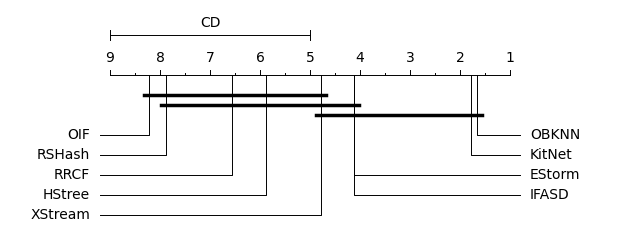

In [16]:
# Generate the report and the plot
# 'alpha' is the significance level
# 'verbose=False' suppresses console output of the report
# 'order='descending' because higher accuracy is better
mean_pivot = filtered_data.pivot_table(
    values="AUC_PR",
    index="scenario",
    columns=["method"],
    aggfunc="mean"
)

result = autorank(mean_pivot, alpha=0.05, verbose=False, order='descending')
#print(result)

#create_report(result)


plot_stats(result, allow_insignificant=False)
plt.savefig(current_dir / 'notebooks' / 'img_cdd'/ "cdd_all_methods.pdf", format="pdf", dpi=300, bbox_inches='tight')

plt.show()

In [17]:
# Pivot for mean
mean_pivot = filtered_data.pivot_table(
    values="AUC_ROC",
    columns="scenario",
    index=["method_and_year", "params_with_window"],
    aggfunc="mean"
)

# Pivot for std
std_pivot = filtered_data.pivot_table(
    values="AUC_ROC",
    columns="scenario",
    index=["method_and_year", "params_with_window"],
    aggfunc="std"
)

# Combine as "mean ± std"
combined = mean_pivot.round(3).astype(str) + " ± " + std_pivot.round(3).astype(str)

# Calculate and append row-wise average of means
avg_col = mean_pivot.mean(axis=1).round(3)
combined["Avg"] = avg_col.astype(str) + " ± " + std_pivot.mean(axis=1).round(3).astype(str)

# Optional: sort by average
# combined = combined.sort_values(by="Avg", ascending=False)

# Display with HTML formatting in Jupyter
combined

/tmp/ipykernel_1937330/2509519040.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  mean_pivot = filtered_data.pivot_table(
/tmp/ipykernel_1937330/2509519040.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  std_pivot = filtered_data.pivot_table(


,scenario,A1,A2,A3,A4,A5,A6,A7,A8,A9,Avg
method_and_year,params_with_window,,,,,,,,,,
EStorm (2007),"{'max_radius': 0.1,'window_size':120}",0.5 ± 0.0,0.5 ± 0.0,0.5 ± 0.0,0.5 ± 0.0,0.5 ± 0.0,0.5 ± 0.0,0.5 ± 0.0,0.5 ± 0.0,0.5 ± 0.0,0.5 ± 0.0
HStree (2011),"{'anomaly_threshold': 0.5, 'max_depth': 15, 'number_of_trees': 25, 'size_limit': 0.1,'window_size':60}",0.399 ± 0.0,0.86 ± 0.0,0.962 ± 0.0,0.341 ± 0.0,0.818 ± 0.0,0.085 ± 0.0,0.161 ± 0.0,0.836 ± 0.0,0.899 ± 0.0,0.596 ± 0.0
IFASD (2013),"{'initial_window_X': None,'window_size':240}",0.998 ± 0.001,0.788 ± 0.035,0.767 ± 0.017,1.0 ± 0.0,0.778 ± 0.015,0.729 ± 0.012,0.996 ± 0.007,0.877 ± 0.014,0.702 ± 0.014,0.848 ± 0.013
KitNet (2018),"{'hidden_ratio': 0.75, 'learning_rate': 0.1, 'max_size_ae': 10,'window_size':240}",0.989 ± 0.0,1.0 ± 0.0,1.0 ± 0.0,0.999 ± 0.0,0.998 ± 0.0,0.991 ± 0.0,0.996 ± 0.0,1.0 ± 0.0,0.997 ± 0.0,0.997 ± 0.0
OBKNN (2025),"{'algorithm': 'brute', 'alpha': 0.05, 'chunk_size': 240, 'dmetric': 'cityblock', 'ensemble_size': 240, 'n_jobs': -1, 'transf': 'ZNORM','window_size':120}",0.999 ± 0.0,0.998 ± 0.0,0.986 ± 0.0,1.0 ± 0.0,0.995 ± 0.0,0.992 ± 0.0,0.999 ± 0.0,0.994 ± 0.0,0.993 ± 0.0,0.995 ± 0.0
OIF (2024),"{'growth_criterion': 'adaptive', 'max_leaf_samples': 32, 'n_jobs': -1, 'num_trees': 32,'window_size':240}",0.92 ± 0.0,0.019 ± 0.0,0.096 ± 0.0,0.84 ± 0.0,0.333 ± 0.0,0.254 ± 0.0,0.847 ± 0.0,0.408 ± 0.0,0.229 ± 0.0,0.438 ± 0.0
RRCF (2016),"{'num_trees': 4, 'tree_size': 256,'window_size':240}",0.753 ± 0.05,0.533 ± 0.056,0.563 ± 0.065,0.795 ± 0.044,0.584 ± 0.066,0.58 ± 0.042,0.83 ± 0.059,0.537 ± 0.026,0.553 ± 0.078,0.637 ± 0.054
RSHash (2011),"{'decay': 0.015, 'feature_maxes': [10000], 'feature_mins': [0], 'num_components': 100, 'num_hash_fns': 1,'window_size':120}",0.484 ± 0.0,0.528 ± 0.0,0.596 ± 0.0,0.497 ± 0.0,0.76 ± 0.0,0.592 ± 0.0,0.79 ± 0.0,0.495 ± 0.0,0.601 ± 0.0,0.594 ± 0.0
XStream (2018),"{'depth': 25, 'n_chains': 100, 'num_components': 100,'window_size':60}",0.967 ± 0.002,0.966 ± 0.003,0.961 ± 0.003,0.974 ± 0.0,0.967 ± 0.001,0.947 ± 0.006,0.971 ± 0.001,0.963 ± 0.002,0.947 ± 0.003,0.963 ± 0.002


In [18]:
# Pivot for mean
mean_pivot = filtered_data.pivot_table(
    values="Max_F1",
    columns="scenario",
    index=["method_and_year", "params_with_window"],
    aggfunc="mean"
)

# Pivot for std
std_pivot = filtered_data.pivot_table(
    values="Max_F1",
    columns="scenario",
    index=["method_and_year", "params_with_window"],
    aggfunc="std"
)

# Combine as "mean ± std"
combined = mean_pivot.round(3).astype(str) + " ± " + std_pivot.round(3).astype(str)

# Calculate and append row-wise average of means
avg_col = mean_pivot.mean(axis=1).round(3)
combined["Avg"] = avg_col.astype(str) + " ± " + std_pivot.mean(axis=1).round(3).astype(str)

# Optional: sort by average
# combined = combined.sort_values(by="Avg", ascending=False)

# Display with HTML formatting in Jupyter
combined

/tmp/ipykernel_1937330/1900266012.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  mean_pivot = filtered_data.pivot_table(
/tmp/ipykernel_1937330/1900266012.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  std_pivot = filtered_data.pivot_table(


,scenario,A1,A2,A3,A4,A5,A6,A7,A8,A9,Avg
method_and_year,params_with_window,,,,,,,,,,
EStorm (2007),"{'max_radius': 0.1,'window_size':120}",0.028 ± 0.0,0.133 ± 0.0,0.25 ± 0.0,0.028 ± 0.0,0.133 ± 0.0,0.25 ± 0.0,0.028 ± 0.0,0.133 ± 0.0,0.25 ± 0.0,0.137 ± 0.0
HStree (2011),"{'anomaly_threshold': 0.5, 'max_depth': 15, 'number_of_trees': 25, 'size_limit': 0.1,'window_size':60}",0.338 ± 0.0,0.848 ± 0.0,0.944 ± 0.0,0.028 ± 0.0,0.656 ± 0.0,0.253 ± 0.0,0.029 ± 0.0,0.803 ± 0.0,0.9 ± 0.0,0.533 ± 0.0
IFASD (2013),"{'initial_window_X': None,'window_size':240}",0.983 ± 0.0,0.492 ± 0.0,0.565 ± 0.029,0.974 ± 0.003,0.435 ± 0.003,0.465 ± 0.023,0.966 ± 0.012,0.859 ± 0.0,0.559 ± 0.0,0.7 ± 0.008
KitNet (2018),"{'hidden_ratio': 0.75, 'learning_rate': 0.1, 'max_size_ae': 10,'window_size':240}",0.983 ± 0.0,0.995 ± 0.0,0.999 ± 0.0,0.952 ± 0.0,0.945 ± 0.0,0.972 ± 0.0,0.86 ± 0.0,0.978 ± 0.0,0.952 ± 0.0,0.959 ± 0.0
OBKNN (2025),"{'algorithm': 'brute', 'alpha': 0.05, 'chunk_size': 240, 'dmetric': 'cityblock', 'ensemble_size': 240, 'n_jobs': -1, 'transf': 'ZNORM','window_size':120}",0.967 ± 0.0,0.963 ± 0.0,0.909 ± 0.0,0.984 ± 0.0,0.924 ± 0.0,0.947 ± 0.0,0.958 ± 0.0,0.917 ± 0.0,0.954 ± 0.0,0.947 ± 0.0
OIF (2024),"{'growth_criterion': 'adaptive', 'max_leaf_samples': 32, 'n_jobs': -1, 'num_trees': 32,'window_size':240}",0.212 ± 0.0,0.134 ± 0.0,0.251 ± 0.0,0.095 ± 0.0,0.134 ± 0.0,0.253 ± 0.0,0.122 ± 0.0,0.136 ± 0.0,0.252 ± 0.0,0.177 ± 0.0
RRCF (2016),"{'num_trees': 4, 'tree_size': 256,'window_size':240}",0.173 ± 0.02,0.151 ± 0.019,0.274 ± 0.023,0.22 ± 0.023,0.168 ± 0.03,0.275 ± 0.023,0.271 ± 0.044,0.145 ± 0.01,0.276 ± 0.035,0.217 ± 0.025
RSHash (2011),"{'decay': 0.015, 'feature_maxes': [10000], 'feature_mins': [0], 'num_components': 100, 'num_hash_fns': 1,'window_size':120}",0.053 ± 0.0,0.246 ± 0.0,0.452 ± 0.0,0.05 ± 0.0,0.39 ± 0.0,0.45 ± 0.0,0.121 ± 0.0,0.233 ± 0.0,0.455 ± 0.0,0.272 ± 0.0
XStream (2018),"{'depth': 25, 'n_chains': 100, 'num_components': 100,'window_size':60}",0.442 ± 0.0,0.76 ± 0.023,0.861 ± 0.0,0.498 ± 0.0,0.773 ± 0.026,0.766 ± 0.036,0.475 ± 0.01,0.708 ± 0.034,0.779 ± 0.018,0.673 ± 0.016


## Summary Training Time of Online Anomaly Detectors with PV Datasets 

In [19]:
# Pivot for mean
mean_pivot = filtered_data.pivot_table(
    values="mean_training_time",
    columns="scenario",
    index=["method_and_year", "params_with_window"],
    aggfunc="mean"
)

# Pivot for std
std_pivot = filtered_data.pivot_table(
    values="mean_training_time",
    columns="scenario",
    index=["method_and_year", "params_with_window"],
    aggfunc="std"
)

# Combine as "mean ± std"
combined = mean_pivot.round(3).astype(str) + " ± " + std_pivot.round(3).astype(str)

# Calculate and append row-wise average of means
avg_col = mean_pivot.mean(axis=1).round(3)
combined["Avg"] = avg_col.astype(str) + " ± " + std_pivot.mean(axis=1).round(3).astype(str)

# Optional: sort by average
# combined = combined.sort_values(by="Avg", ascending=False)

# Display with HTML formatting in Jupyter
combined

/tmp/ipykernel_1937330/1886855218.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  mean_pivot = filtered_data.pivot_table(
/tmp/ipykernel_1937330/1886855218.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  std_pivot = filtered_data.pivot_table(


,scenario,A1,A2,A3,A4,A5,A6,A7,A8,A9,Avg
method_and_year,params_with_window,,,,,,,,,,
EStorm (2007),"{'max_radius': 0.1,'window_size':120}",0.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0
HStree (2011),"{'anomaly_threshold': 0.5, 'max_depth': 15, 'number_of_trees': 25, 'size_limit': 0.1,'window_size':60}",0.001 ± 0.001,0.001 ± 0.0,0.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0
IFASD (2013),"{'initial_window_X': None,'window_size':240}",0.01 ± 0.001,0.011 ± 0.001,0.01 ± 0.001,0.009 ± 0.0,0.011 ± 0.001,0.003 ± 0.0,0.007 ± 0.001,0.006 ± 0.0,0.006 ± 0.0,0.008 ± 0.001
KitNet (2018),"{'hidden_ratio': 0.75, 'learning_rate': 0.1, 'max_size_ae': 10,'window_size':240}",0.108 ± 0.003,0.108 ± 0.001,0.11 ± 0.003,0.102 ± 0.002,0.097 ± 0.002,0.026 ± 0.0,0.085 ± 0.001,0.079 ± 0.001,0.079 ± 0.001,0.088 ± 0.001
OBKNN (2025),"{'algorithm': 'brute', 'alpha': 0.05, 'chunk_size': 240, 'dmetric': 'cityblock', 'ensemble_size': 240, 'n_jobs': -1, 'transf': 'ZNORM','window_size':120}",0.293 ± 0.001,0.311 ± 0.003,0.307 ± 0.004,0.297 ± 0.007,0.323 ± 0.01,0.107 ± 0.005,0.299 ± 0.009,0.316 ± 0.003,0.319 ± 0.004,0.286 ± 0.005
OIF (2024),"{'growth_criterion': 'adaptive', 'max_leaf_samples': 32, 'n_jobs': -1, 'num_trees': 32,'window_size':240}",0.053 ± 0.006,0.057 ± 0.002,0.056 ± 0.003,0.046 ± 0.001,0.046 ± 0.0,0.051 ± 0.006,0.069 ± 0.004,0.074 ± 0.003,0.079 ± 0.002,0.059 ± 0.003
RRCF (2016),"{'num_trees': 4, 'tree_size': 256,'window_size':240}",0.014 ± 0.001,0.016 ± 0.001,0.015 ± 0.001,0.013 ± 0.001,0.015 ± 0.001,0.006 ± 0.0,0.012 ± 0.003,0.011 ± 0.002,0.01 ± 0.001,0.012 ± 0.001
RSHash (2011),"{'decay': 0.015, 'feature_maxes': [10000], 'feature_mins': [0], 'num_components': 100, 'num_hash_fns': 1,'window_size':120}",0.006 ± 0.0,0.006 ± 0.0,0.006 ± 0.0,0.006 ± 0.0,0.006 ± 0.0,0.001 ± 0.0,0.004 ± 0.0,0.003 ± 0.0,0.003 ± 0.0,0.005 ± 0.0
XStream (2018),"{'depth': 25, 'n_chains': 100, 'num_components': 100,'window_size':60}",0.316 ± 0.004,0.309 ± 0.006,0.286 ± 0.018,0.296 ± 0.006,0.29 ± 0.004,0.107 ± 0.001,0.212 ± 0.007,0.201 ± 0.003,0.201 ± 0.004,0.246 ± 0.006


## Summary Scoring Time of Online Anomaly Detectors with PV Datasets 

In [20]:
# Pivot for mean
mean_pivot = filtered_data.pivot_table(
    values="mean_scoring_time",
    columns="scenario",
    index=["method_and_year", "params_with_window"],
    aggfunc="mean"
)

# Pivot for std
std_pivot = filtered_data.pivot_table(
    values="mean_scoring_time",
    columns="scenario",
    index=["method_and_year", "params_with_window"],
    aggfunc="std"
)

# Combine as "mean ± std"
combined = mean_pivot.round(3).astype(str) + " ± " + std_pivot.round(3).astype(str)

# Calculate and append row-wise average of means
avg_col = mean_pivot.mean(axis=1).round(3)
combined["Avg"] = avg_col.astype(str) + " ± " + std_pivot.mean(axis=1).round(3).astype(str)

# Optional: sort by average
# combined = combined.sort_values(by="Avg", ascending=False)

# Display with HTML formatting in Jupyter
combined

/tmp/ipykernel_1937330/1551242440.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  mean_pivot = filtered_data.pivot_table(
/tmp/ipykernel_1937330/1551242440.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  std_pivot = filtered_data.pivot_table(


,scenario,A1,A2,A3,A4,A5,A6,A7,A8,A9,Avg
method_and_year,params_with_window,,,,,,,,,,
EStorm (2007),"{'max_radius': 0.1,'window_size':120}",0.001 ± 0.0,0.001 ± 0.0,0.001 ± 0.0,0.001 ± 0.0,0.001 ± 0.0,0.0 ± 0.0,0.001 ± 0.0,0.001 ± 0.0,0.001 ± 0.0,0.001 ± 0.0
HStree (2011),"{'anomaly_threshold': 0.5, 'max_depth': 15, 'number_of_trees': 25, 'size_limit': 0.1,'window_size':60}",0.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0
IFASD (2013),"{'initial_window_X': None,'window_size':240}",0.002 ± 0.0,0.002 ± 0.0,0.002 ± 0.0,0.002 ± 0.0,0.003 ± 0.0,0.001 ± 0.0,0.002 ± 0.0,0.002 ± 0.0,0.001 ± 0.0,0.002 ± 0.0
KitNet (2018),"{'hidden_ratio': 0.75, 'learning_rate': 0.1, 'max_size_ae': 10,'window_size':240}",0.104 ± 0.003,0.105 ± 0.002,0.108 ± 0.003,0.095 ± 0.002,0.089 ± 0.002,0.023 ± 0.0,0.088 ± 0.001,0.087 ± 0.001,0.088 ± 0.0,0.087 ± 0.002
OBKNN (2025),"{'algorithm': 'brute', 'alpha': 0.05, 'chunk_size': 240, 'dmetric': 'cityblock', 'ensemble_size': 240, 'n_jobs': -1, 'transf': 'ZNORM','window_size':120}",0.415 ± 0.004,0.405 ± 0.003,0.388 ± 0.001,0.421 ± 0.009,0.422 ± 0.01,0.265 ± 0.001,0.335 ± 0.004,0.338 ± 0.002,0.339 ± 0.002,0.37 ± 0.004
OIF (2024),"{'growth_criterion': 'adaptive', 'max_leaf_samples': 32, 'n_jobs': -1, 'num_trees': 32,'window_size':240}",0.005 ± 0.001,0.006 ± 0.0,0.006 ± 0.001,0.005 ± 0.0,0.005 ± 0.0,0.006 ± 0.0,0.009 ± 0.001,0.009 ± 0.001,0.009 ± 0.0,0.007 ± 0.0
RRCF (2016),"{'num_trees': 4, 'tree_size': 256,'window_size':240}",0.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0
RSHash (2011),"{'decay': 0.015, 'feature_maxes': [10000], 'feature_mins': [0], 'num_components': 100, 'num_hash_fns': 1,'window_size':120}",0.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0
XStream (2018),"{'depth': 25, 'n_chains': 100, 'num_components': 100,'window_size':60}",0.3 ± 0.002,0.296 ± 0.005,0.279 ± 0.018,0.285 ± 0.005,0.28 ± 0.003,0.101 ± 0.001,0.196 ± 0.007,0.191 ± 0.003,0.192 ± 0.004,0.236 ± 0.005


## Summary Online Anomaly Detectors with PV Datasets 

In [21]:
df_ablation.method_window_and_param.unique()

array(["SWKNN_60_{'k': 10, 'k_is_max': False, 'max_node_size': 20, 'metric': 'cityblock', 'min_node_size': 5, 'split_sampling': 5}",
       "SWKNN_60_{'k': 1, 'k_is_max': False, 'max_node_size': 20, 'metric': 'cityblock', 'min_node_size': 5, 'split_sampling': 5}",
       "SWKNN_60_{'k': 50, 'k_is_max': False, 'max_node_size': 20, 'metric': 'cityblock', 'min_node_size': 5, 'split_sampling': 5}",
       "SWKNN_120_{'k': 50, 'k_is_max': False, 'max_node_size': 20, 'metric': 'cityblock', 'min_node_size': 5, 'split_sampling': 5}",
       "SWKNN_120_{'k': 1, 'k_is_max': False, 'max_node_size': 20, 'metric': 'cityblock', 'min_node_size': 5, 'split_sampling': 5}",
       "SWKNN_120_{'k': 10, 'k_is_max': False, 'max_node_size': 20, 'metric': 'cityblock', 'min_node_size': 5, 'split_sampling': 5}",
       "SWKNN_240_{'k': 50, 'k_is_max': False, 'max_node_size': 20, 'metric': 'cityblock', 'min_node_size': 5, 'split_sampling': 5}",
       "SWKNN_240_{'k': 1, 'k_is_max': False, 'max_node_size': 20, 

In [22]:
regex_pattern = r"'k':\s*(\d+)"

# Use .str.extract() to pull out the captured digits
df_ablation['k_parameter'] = df_ablation['params_with_window'].str.extract(regex_pattern).replace(np.nan, "1")


/tmp/ipykernel_1937330/2378756488.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ablation['k_parameter'] = df_ablation['params_with_window'].str.extract(regex_pattern).replace(np.nan, "1")


In [23]:
# average results over all iterations and all scenarios
averaged_results = df_ablation.groupby(['method', 'scenario', 'params_with_window','k_parameter'])['AUC_PR'].agg(
    mean_auc_pr='mean',
    std_auc_pr='std',
    n_runs='count'
).reset_index()

summary = averaged_results.groupby(['method', 'params_with_window','k_parameter']).agg(
    mean_auc_pr=('mean_auc_pr', 'mean'),
    std_auc_pr=('std_auc_pr', 'mean'),
    n_scenarios=('mean_auc_pr', 'count')
).reset_index()

total_scenarios = len(df_ablation.scenario.unique())
# Compute overall mean, std, and count across all datasets
# Exclude the rows where the number of scenarios is not equal to total_scenarios
summary = summary[summary.n_scenarios==total_scenarios]

# Select the highest AUC_PR per method (after averaging across iterations)
best_results = (
    summary
    .sort_values(['mean_auc_pr','std_auc_pr'], ascending=[False, True])
    .groupby(['method','k_parameter'])
    .head(1)
)
best_params = best_results['params_with_window'].unique().tolist()

# Ensure parameters are strings for consistent matching

# Filter rows where 'parameters' column contains any of the best_params
df_ablation = df_ablation[df_ablation['params_with_window'].isin(best_params)]

best_params

/tmp/ipykernel_1937330/4186895460.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  averaged_results = df_ablation.groupby(['method', 'scenario', 'params_with_window','k_parameter'])['AUC_PR'].agg(


["{'algorithm': 'brute', 'alpha': 0.05, 'chunk_size': 240, 'dmetric': 'cityblock', 'ensemble_size': 240, 'n_jobs': -1, 'transf': 'ZNORM','window_size':120}",
 "{'k': 1, 'k_is_max': False, 'max_node_size': 20, 'metric': 'cityblock', 'min_node_size': 5, 'split_sampling': 5,'window_size':240}",
 "{'k': 10, 'k_is_max': False, 'max_node_size': 20, 'metric': 'cityblock', 'min_node_size': 5, 'split_sampling': 5,'window_size':240}",
 "{'k': 50, 'k_is_max': False, 'max_node_size': 20, 'metric': 'cityblock', 'min_node_size': 5, 'split_sampling': 5,'window_size':240}"]

In [24]:

# Pivot for mean
mean_pivot = df_ablation.pivot_table(
    values="AUC_PR",
    columns="scenario",
    index=["method", "params_with_window"],
    aggfunc="mean"
)

# Pivot for std
std_pivot = df_ablation.pivot_table(
    values="AUC_PR",
    columns="scenario",
    index=["method", "params_with_window"],
    aggfunc="std"
)



/tmp/ipykernel_1937330/3715483830.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  mean_pivot = df_ablation.pivot_table(
/tmp/ipykernel_1937330/3715483830.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  std_pivot = df_ablation.pivot_table(


In [25]:


mean_pivot["Avg"] = mean_pivot.mean(axis=1).round(3)
mean_pivot.round(3)

scenario                                                                                                                                                                    A1  \
method        params_with_window                                                                                                                                                 
OnlineBootKNN {'algorithm': 'brute', 'alpha': 0.05, 'chunk_size': 240, 'dmetric': 'cityblock', 'ensemble_size': 240, 'n_jobs': -1, 'transf': 'ZNORM','window_size':120}  0.981   
SWKNN         {'k': 1, 'k_is_max': False, 'max_node_size': 20, 'metric': 'cityblock', 'min_node_size': 5, 'split_sampling': 5,'window_size':240}                         0.835   
              {'k': 10, 'k_is_max': False, 'max_node_size': 20, 'metric': 'cityblock', 'min_node_size': 5, 'split_sampling': 5,'window_size':240}                        0.636   
              {'k': 50, 'k_is_max': False, 'max_node_size': 20, 'metric': 'cityblock', 'min_node_size': 5, 'split_sampling': 5,'window_size':240}                        0.334   

scenario                                                                                                                                                                    A2  \
method        params_with_window                                                                                                                                                 
OnlineBootKNN {'algorithm': 'brute', 'alpha': 0.05, 'chunk_size': 240, 'dmetric': 'cityblock', 'ensemble_size': 240, 'n_jobs': -1, 'transf': 'ZNORM','window_size':120}  0.963   
SWKNN         {'k': 1, 'k_is_max': False, 'max_node_size': 20, 'metric': 'cityblock', 'min_node_size': 5, 'split_sampling': 5,'window_size':240}                         0.956   
              {'k': 10, 'k_is_max': False, 'max_node_size': 20, 'metric': 'cityblock', 'min_node_size': 5, 'split_sampling': 5,'window_size':240}                        0.812   
              {'k': 50, 'k_is_max': False, 'max_node_size': 20, 'metric': 'cityblock', 'min_node_size': 5, 'split_sampling': 5,'window_size':240}                        0.554   

scenario                                                                                                                                                                    A3  \
method        params_with_window                                                                                                                                                 
OnlineBootKNN {'algorithm': 'brute', 'alpha': 0.05, 'chunk_size': 240, 'dmetric': 'cityblock', 'ensemble_size': 240, 'n_jobs': -1, 'transf': 'ZNORM','window_size':120}  0.888   
SWKNN         {'k': 1, 'k_is_max': False, 'max_node_size': 20, 'metric': 'cityblock', 'min_node_size': 5, 'split_sampling': 5,'window_size':240}                         0.975   
              {'k': 10, 'k_is_max': False, 'max_node_size': 20, 'metric': 'cityblock', 'min_node_size': 5, 'split_sampling': 5,'window_size':240}                        0.883   
              {'k': 50, 'k_is_max': False, 'max_node_size': 20, 'metric': 'cityblock', 'min_node_size': 5, 'split_sampling': 5,'window_size':240}                        0.683   

scenario                                                                                                                                                                    A4  \
method        params_with_window                                                                                                                                                 
OnlineBootKNN {'algorithm': 'brute', 'alpha': 0.05, 'chunk_size': 240, 'dmetric': 'cityblock', 'ensemble_size': 240, 'n_jobs': -1, 'transf': 'ZNORM','window_size':120}  0.930   
SWKNN         {'k': 1, 'k_is_max': False, 'max_node_size': 20, 'metric': 'cityblock', 'min_node_size': 5, 'split_sampling': 5,'window_size':240}                         0.844   
              {'k': 10, 'k_is_max': False, 'max_node_size': 20, 'metric': 'citybl